In [60]:

import os
from dotenv import load_dotenv
import json
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

True

In [5]:
db_name = os.getenv('DATABASE')
host_name = os.getenv('DATABASE_HOST')
user_name = os.getenv('DATABASE_USERNAME')
user_password = os.getenv('DATABASE_PASSWORD')

In [43]:
import mlflow
import MySQLdb
import pandas as pd
import os
from syncflowai import plot_and_save, fetch_data
from dotenv import load_dotenv
load_dotenv()

db_name = os.getenv('DATABASE')
host_name = os.getenv('DATABASE_HOST')
user_name = os.getenv('DATABASE_USERNAME')
user_password = os.getenv('DATABASE_PASSWORD')

# Connexion à la base de données MySQL
db = MySQLdb.connect(host=host_name,    # votre hôte, habituellement localhost
                     user=user_name,    # votre nom d'utilisateur
                     passwd=user_password,  # votre mot de passe
                     db=db_name)    # le nom de la base de données

# Création d'un objet Cursor
cur = db.cursor()

# Requête pour récupérer les 50 dernières entrées pour la version "v1"
cur.execute("""
SELECT * FROM user_feedback 
WHERE prompt_version = 'v1' 
ORDER BY id DESC 
LIMIT 50
""")

# Récupération des résultats dans un DataFrame pandas
data_v1 = pd.DataFrame(list(cur.fetchall()), columns=['id', 'user_rating', 'user_comments', 'prompt_version', 'mission_id'])

# Répéter la même opération pour la version "v2"
cur.execute("""
SELECT * FROM user_feedback 
WHERE prompt_version = 'v2' 
ORDER BY id DESC 
LIMIT 50
""")

data_v2 = pd.DataFrame(list(cur.fetchall()), columns=['id', 'user_rating', 'user_comments', 'prompt_version', 'mission_id'])

# Fermer la connexion
cur.close()
db.close()

# Calcul de la moyenne des notes pour chaque version
mean_rating_v1 = data_v1['user_rating'].mean()
mean_rating_v2 = data_v2['user_rating'].mean()

# Calcul du nombre de commentaires pour chaque version
num_comments_v1 = data_v1['user_comments'].count()
num_comments_v2 = data_v2['user_comments'].count()

# Distribution des notes
rating_distribution_v1 = data_v1['user_rating'].value_counts().sort_index()
rating_distribution_v2 = data_v2['user_rating'].value_counts().sort_index()

# Distribution des notes pour v1
plt.figure(figsize=(10, 6))
sns.countplot(x='user_rating', data=data_v1)
plt.title('Distribution des notes pour la version v1')
plt.savefig('./artifacts/distribution_v1.png')  # Enregistrement de l'image
plt.show()

# Distribution des notes pour v2
plt.figure(figsize=(10, 6))
sns.countplot(x='user_rating', data=data_v2)
plt.title('Distribution des notes pour la version v2')
plt.savefig('./artifacts/distribution_v2.png')  # Enregistrement de l'image
plt.show()

# Comparaison des moyennes des notes
plt.figure(figsize=(10, 6))
sns.barplot(x=['v1', 'v2'], y=[mean_rating_v1, mean_rating_v2])
plt.title('Comparaison des moyennes des notes pour v1 et v2')
plt.savefig('.artifacts/mean_ratings_comparison.png')  # Enregistrement de l'image
plt.show()


# Connexion à la base de données MySQL
db = MySQLdb.connect(host=host_name, user=user_name, passwd=user_password, db=db_name)

# Création d'un objet Cursor
cur = db.cursor()

# Exécuter la requête
cur.execute("""
SELECT 
    uf.mission_id,
    uf.prompt_version,
    rr.usage,
    rr.cost
FROM 
    user_feedback AS uf
INNER JOIN 
    processed_mission AS pm ON uf.mission_id = pm.id
INNER JOIN 
    raw_response AS rr ON pm.metadata_id = rr.id
""")

# Récupération des résultats dans un DataFrame pandas
data = pd.DataFrame(list(cur.fetchall()), columns=['mission_id', 'prompt_version', 'usage', 'cost'])

# Fermer la connexion
cur.close()
db.close()

# Traitement des données JSON des colonnes 'usage' et 'cost'
data['usage'] = data['usage'].apply(json.loads)
data['cost'] = data['cost'].apply(json.loads)

# Extraire les tokens et le coût total
data['total_tokens'] = data['usage'].apply(lambda x: x['total_tokens'])
data['total_cost'] = data['cost'].apply(lambda x: x['total'])

# Calculer des métriques selon les versions des prompts
stats_per_prompt_version = data.groupby(['prompt_version']).agg({
    'total_tokens': ['sum', 'mean', 'median'],
    'total_cost': ['sum', 'mean', 'median']
})

# Afficher les résultats
print("Statistiques des Tokens et Coûts par Version de Prompt:")
print(stats_per_prompt_version)

In [2]:
data_v1 = fetch_data(query_v1)

In [3]:
data_v1

,0,1,2,3,4
0,f9892a5c-875b-11ee-a734-820394059a04,3,The AI failed to recognize the distinct requir...,v1,f5669068-875b-11ee-a734-820394059a04
1,f20cb41a-8760-11ee-8d68-820394059a04,3,The AI did not fully grasp the nuances of my p...,v1,ebc21852-8760-11ee-8d68-820394059a04
2,ef9b3614-86e0-11ee-8dc3-820394059a04,1,The AI's response lacks detail and does not di...,v1,eb088a84-86e0-11ee-8dc3-820394059a04
3,eba808d8-875e-11ee-8d68-820394059a04,3,The AI failed to properly capture the technica...,v1,df6a0896-875e-11ee-8d68-820394059a04
4,ea7e25be-8763-11ee-8d68-820394059a04,3,The AI summary did not fully match the technic...,v1,e6683cee-8763-11ee-8d68-820394059a04
5,ea0e9b1c-8764-11ee-8d68-820394059a04,4,The assistance provided by the AI regarding te...,v1,e6e8f1c6-8764-11ee-8d68-820394059a04
6,e6000882-875d-11ee-a734-820394059a04,3,The AI assistant failed to capture all the nua...,v1,dfd7cac6-875d-11ee-a734-820394059a04
7,da7507e8-875c-11ee-a734-820394059a04,1,The AI's parsing of mission details was lacklu...,v1,d5e197a0-875c-11ee-a734-820394059a04
8,ce8e3e46-8760-11ee-8d68-820394059a04,5,The AI successfully identified the key phases ...,v1,cbf49996-8760-11ee-8d68-820394059a04
9,cb7a40f2-8764-11ee-8d68-820394059a04,2,The AI assistant didn't capture the essence of...,v1,c5b40626-8764-11ee-8d68-820394059a04


In [1]:
import mlflow
from syncflowai import plot_and_save, fetch_data
from dotenv import load_dotenv
load_dotenv()

# Requêtes SQL
query_v1 = "SELECT * FROM user_feedback WHERE prompt_version = 'v1' ORDER BY id DESC LIMIT 50"
query_v2 = "SELECT * FROM user_feedback WHERE prompt_version = 'v2' ORDER BY id DESC LIMIT 50"

# Récupération des données
data_v1 = fetch_data(query_v1)
data_v2 = fetch_data(query_v2)

# Calculs
mean_rating_v1 = data_v1['user_rating'].mean()
mean_rating_v2 = data_v2['user_rating'].mean()

# Graphiques
plot_and_save(data_v1, 'count', 'Distribution des notes pour la version v1', 'distribution_v1')
plot_and_save(data_v2, 'count', 'Distribution des notes pour la version v2', 'distribution_v2')
plot_and_save([mean_rating_v1, mean_rating_v2], 'bar', 'Comparaison des moyennes des notes pour v1 et v2', 'mean_ratings_comparison')


/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported a

In [ ]:
# Logger les graphiques
mlflow.log_artifact('total_tokens_stats.png')
mlflow.log_artifact('total_cost_stats.png')


In [2]:
# Préparation des données pour le graphique
data_graph = stats_per_prompt_version.copy()
data_graph.columns = ['_'.join(col).strip() for col in data_graph.columns.values]

# Création d'un graphique à barres pour les tokens et les coûts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe pour les tokens
color = 'tab:blue'
ax1.set_xlabel('Version de Prompt')
ax1.set_ylabel('Total Tokens', color=color)
ax1.bar(data_graph.index, data_graph['total_tokens_sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Axe pour les coûts
ax2 = ax1.twinx()  # instancier un deuxième axe qui partage le même axe x
color = 'tab:red'
ax2.set_ylabel('Coût Total', color=color)  # nous avons déjà géré l'étiquette x
ax2.bar(data_graph.index, data_graph['total_cost_sum'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # pour que les étiquettes ne soient pas coupées
plt.title('Comparaison des Tokens et Coûts par Version de Prompt')
plt.savefig('./artifacts/tokens_and_costs_comparison.png')
plt.show()

NameError: name 'stats_per_prompt_version' is not defined

NameError: name 'data' is not defined

/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'./artifacts/{filename}.png')
/Users/valentin/Desktop/syncflow_ai/syncflowai.py:265: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inches_restore" which is no longer supported a

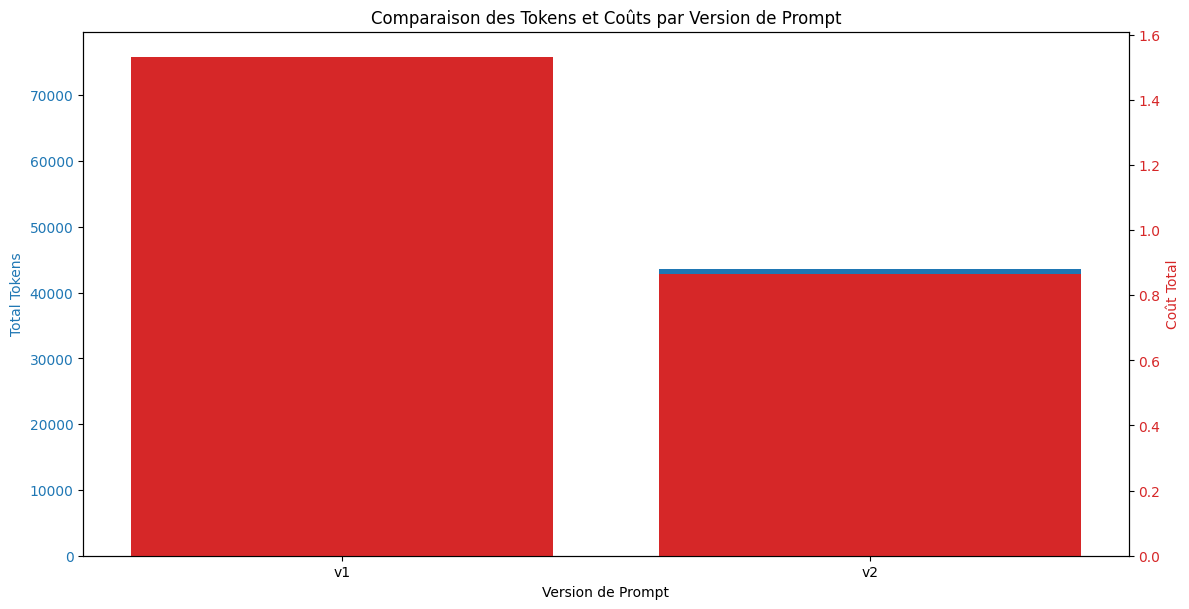

In [6]:

from dotenv import load_dotenv
import json
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

# Récupération des données pour les versions v1 et v2
data_v1 = fetch_data("SELECT * FROM user_feedback WHERE prompt_version = 'v1' ORDER BY id DESC LIMIT 50")
data_v2 = fetch_data("SELECT * FROM user_feedback WHERE prompt_version = 'v2' ORDER BY id DESC LIMIT 50")

# Calcul des moyennes et distribution des notes
mean_rating_v1 = data_v1['user_rating'].mean()
mean_rating_v2 = data_v2['user_rating'].mean()
rating_distribution_v1 = data_v1['user_rating'].value_counts().sort_index()
rating_distribution_v2 = data_v2['user_rating'].value_counts().sort_index()

# Création des graphiques
plot_and_save(data_v1, 'count', 'Distribution des notes pour la version v1', 'distribution_v1')
plot_and_save(data_v2, 'count', 'Distribution des notes pour la version v2', 'distribution_v2')
plot_and_save([mean_rating_v1, mean_rating_v2], 'bar', 'Comparaison des moyennes des notes pour v1 et v2', 'mean_ratings_comparison')

# Récupération et traitement des données pour les coûts et tokens
data = fetch_data("""
SELECT 
    uf.mission_id,
    uf.prompt_version,
    rr.usage,
    rr.cost
FROM 
    user_feedback AS uf
INNER JOIN 
    processed_mission AS pm ON uf.mission_id = pm.id
INNER JOIN 
    raw_response AS rr ON pm.metadata_id = rr.id
""")
data['usage'] = data['usage'].apply(json.loads)
data['cost'] = data['cost'].apply(json.loads)
data['total_tokens'] = data['usage'].apply(lambda x: x['total_tokens'])
data['total_cost'] = data['cost'].apply(lambda x: x['total'])

# Calcul des métriques par version de prompt
stats_per_prompt_version = data.groupby(['prompt_version']).agg({
    'total_tokens': ['sum', 'mean', 'median'],
    'total_cost': ['sum', 'mean', 'median']
})

# Préparation des données pour le graphique des coûts et tokens
data_graph = stats_per_prompt_version.copy()
data_graph.columns = ['_'.join(col).strip() for col in data_graph.columns.values]

# Création d'un graphique à barres pour les tokens et les coûts
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Version de Prompt')
ax1.set_ylabel('Total Tokens', color=color)
ax1.bar(data_graph.index, data_graph['total_tokens_sum'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
 
# Axe pour les coûts
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Coût Total', color=color)
ax2.bar(data_graph.index, data_graph['total_cost_sum'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # pour que les étiquettes ne soient pas coupées
plt.title('Comparaison des Tokens et Coûts par Version de Prompt')
plt.savefig('./artifacts/tokens_and_costs_comparison.png')
plt.show()